Basic Agent


In [1]:
import langchain
langchain.__version__

'1.2.7'

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

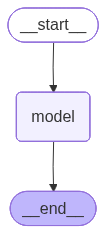

In [7]:
from langchain.agents import create_agent

def get_weather(city:str)-> str:
    """Get the weather for a city."""
    return f"The weather in {city} is brown."


agent=create_agent(
    model="groq:llama-3.3-70b-versatile",
    tools=[],
    system_prompt="You are a helpful assistant."
)
agent

In [8]:
# running the agent
response = agent.invoke({"messages":[{"role":"user","content":"What are YOU?"}]})
response

{'messages': [HumanMessage(content='What are YOU?', additional_kwargs={}, response_metadata={}, id='b7cc18fe-02f2-4011-91ac-b5865a415795'),
  AIMessage(content="I'm an artificial intelligence (AI) designed to assist and communicate with users like you. My purpose is to provide information, answer questions, and help with tasks to the best of my abilities. I'm a computer program that uses natural language processing (NLP) to understand and generate human-like text.\n\nI can be thought of as a virtual assistant, similar to Siri, Google Assistant, or Alexa, but with a text-based interface. I don't have a physical body or emotions, but I'm designed to be helpful, informative, and engaging.\n\nSome of the things I can do include:\n\n* Answering questions on a wide range of topics\n* Providing definitions and explanations\n* Translating text from one language to another\n* Generating text summaries or articles\n* Offering suggestions and ideas\n* Chatting and conversing with users\n* Playing

In [9]:
response["messages"][1].content

"I'm an artificial intelligence (AI) designed to assist and communicate with users like you. My purpose is to provide information, answer questions, and help with tasks to the best of my abilities. I'm a computer program that uses natural language processing (NLP) to understand and generate human-like text.\n\nI can be thought of as a virtual assistant, similar to Siri, Google Assistant, or Alexa, but with a text-based interface. I don't have a physical body or emotions, but I'm designed to be helpful, informative, and engaging.\n\nSome of the things I can do include:\n\n* Answering questions on a wide range of topics\n* Providing definitions and explanations\n* Translating text from one language to another\n* Generating text summaries or articles\n* Offering suggestions and ideas\n* Chatting and conversing with users\n* Playing text-based games or engaging in creative activities\n\nI'm constantly learning and improving my abilities, so please bear with me if I make any mistakes or don

In [10]:
agent.stream({"context":"How are chips made in factory"})


<generator object Pregel.stream at 0xb9ac02810>

In [25]:
for chunk in agent.stream({"question":"How are chips made ?"}):
    print(chunk["model"]["messages"][0].content)
    

How can I assist you today? Do you have any questions, need help with a problem, or would you like to chat? I'm here to help.


In [28]:
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage

llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    streaming=True
)

for chunk in llm.stream([
    HumanMessage(content="Who is albert Einstein?")
]):
    print(chunk.content, end="", flush=True)


Albert Einstein (1879-1955) was a renowned German-born physicist who is widely regarded as one of the most influential scientists of the 20th century. He is best known for his groundbreaking work in theoretical physics, particularly in the development of the theory of relativity and the famous equation E=mc².

**Early Life and Education**

Einstein was born in Munich, Germany, to a middle-class Jewish family. He grew up in a curious and imaginative environment, with a strong interest in science and mathematics. He spent most of his early life in Switzerland, where he studied physics at the Swiss Federal Polytechnic University. After completing his studies, he worked as a patent clerk in Bern, Switzerland, for seven years.

**Career and Contributions**

Einstein's career in physics began in the early 1900s, when he started working on his theory of special relativity. In 1905, he published four groundbreaking papers that transformed the field of physics:

1. **Special Relativity**: Einst

In [29]:
for chunk in llm.stream([
    HumanMessage(content="What happened after albert Einstein's death?")
]):
    print(chunk.content, end="", flush=True)

After Albert Einstein's death on April 18, 1955, several events took place:

1. **Autopsy and Brain Preservation**: Einstein's brain was preserved and studied by pathologist Thomas Harvey, who performed the autopsy. Harvey removed and preserved Einstein's brain, which was later sectioned and analyzed to understand the neural basis of his intelligence and creativity.
2. **Funeral and Cremation**: Einstein's body was cremated, and his ashes were scattered in an undisclosed location, as per his wishes. There was no formal funeral or memorial service, in keeping with his desire for simplicity and humility.
3. **Legacy and Tributes**: Einstein's death sparked an outpouring of tributes and accolades from around the world. He was remembered as a genius, a visionary, and a passionate advocate for peace, civil rights, and social justice.
4. **Estate and Archives**: Einstein's estate, including his personal papers, correspondence, and literary works, was managed by the Hebrew University of Jerus

In [ ]:
responses = llm.batch([
    "Why did Oppenheimer created the nuke ?",
    "How did Einstein Influence Oppenheimer ?",
    "Why are humans so curious at some things ?"
],
config={
    'max_concurrency' : 5 # limits parallel to 5
}
)
for response in responses:
    print(response)

content='J. Robert Oppenheimer, an American theoretical physicist, was the director of the Manhattan Project, a research and development project that produced the atomic bomb during World War II. However, Oppenheimer did not single-handedly create the nuclear bomb. The development of the atomic bomb was a collaborative effort by a team of scientists, engineers, and technicians from the United States, the United Kingdom, and Canada.\n\nThe primary motivation behind the development of the atomic bomb was to counter the threat of Nazi Germany\'s potential development of a nuclear weapon. In the early 1940s, there were concerns that Germany, under the leadership of Adolf Hitler, might be working on a nuclear program, and the Allies wanted to develop a similar capability to prevent Germany from gaining a strategic advantage.\n\nIn 1939, physicist Albert Einstein, who was a refugee from Nazi Germany, wrote a letter to President Franklin D. Roosevelt warning him of the possibility of Germany 

In [33]:
for response in responses:
    print(response.content)
    print('='*70)

J. Robert Oppenheimer, an American theoretical physicist, was the director of the Manhattan Project, a research and development project that produced the atomic bomb during World War II. However, Oppenheimer did not single-handedly create the nuclear bomb. The development of the atomic bomb was a collaborative effort by a team of scientists, engineers, and technicians from the United States, the United Kingdom, and Canada.

The primary motivation behind the development of the atomic bomb was to counter the threat of Nazi Germany's potential development of a nuclear weapon. In the early 1940s, there were concerns that Germany, under the leadership of Adolf Hitler, might be working on a nuclear program, and the Allies wanted to develop a similar capability to prevent Germany from gaining a strategic advantage.

In 1939, physicist Albert Einstein, who was a refugee from Nazi Germany, wrote a letter to President Franklin D. Roosevelt warning him of the possibility of Germany developing an 

## Tools

In [39]:
import os
from langchain.chat_models import init_chat_model

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

model = init_chat_model("groq:qwen/qwen3-32b")
response = model.invoke("Why do parrots talk?")
response

AIMessage(content='<think>\nOkay, so I need to figure out why parrots talk. Hmm, let me start by recalling what I know about parrots. Parrots are birds, right? Some species are known for their ability to mimic human speech, like budgies, macaws, and African greys. But why do they do that? Is it just to imitate, or is there a deeper reason?\n\nFirst, maybe I should think about the evolutionary aspect. Do parrots talk to communicate with each other? In the wild, do they use vocalizations for specific purposes? I remember that in the wild, parrots might use calls for things like alerting others to food sources, warning of predators, or social bonding. But human speech is different. So maybe when they\'re with humans, they mimic human speech as a way to communicate with us, similar to how they use calls in the wild.\n\nAnother angle is social behavior. Parrots are highly social animals. In the wild, they live in flocks, and communication is crucial for maintaining social structures. If the

In [49]:
from langchain.tools import tool

@tool
def get_weather(location:str)->str:
    """Get the weather at a location"""
    return f"The weather is not so good in {location}"


model_with_tools=model.bind_tools([get_weather])

In [41]:
response = model_with_tools.invoke("What's the weather like in Boston?")
print(response)
for tool_call in response.tool_calls:
    # View tool calls made by the model
    print(f"Tool: {tool_call['name']}")
    print(f"Args: {tool_call['args']}")

content='' additional_kwargs={'reasoning_content': 'Okay, the user is asking about the weather in Boston. I need to use the get_weather function. Let me check the function parameters. The required parameter is location, which should be a string. So I\'ll call get_weather with location set to "Boston". Make sure the JSON is correctly formatted.\n', 'tool_calls': [{'id': 'h4e68kj0r', 'function': {'arguments': '{"location":"Boston"}', 'name': 'get_weather'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 154, 'total_tokens': 239, 'completion_time': 0.120074245, 'completion_tokens_details': {'reasoning_tokens': 61}, 'prompt_time': 0.006542813, 'prompt_tokens_details': None, 'queue_time': 0.056096977, 'total_time': 0.126617058}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--019c17cc-f10f-79c1-8a5f-0b3

Tool Execution Loop

In [ ]:
messages = [{"role":"user","content":"What's the weather today in Boston ?"}]
ai_message = model_with_tools.invoke(messages)
messages.append(ai_message)

# Execute tools and collect results
for tool_call in ai_message.tool_calls:
    # Execute the tool with the generated arguments
    tool_result = get_weather.invoke(tool_call)
    messages.append(tool_result)

final_result = model_with_tools.invoke(messages)
print(final_result.text)

The weather in Boston today is not so good.


In [51]:
messages

[{'role': 'user', 'content': "What's the weather today in Boston ?"},
 AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for the weather in Boston today. I need to use the get_weather function. The function requires the location parameter, which in this case is Boston. So I\'ll call the function with location set to "Boston". Let me make sure there are no other parameters needed. The tool definition shows only location is required. Alright, I\'ll format the tool call correctly within the XML tags.\n', 'tool_calls': [{'id': 'w6vj2fckw', 'function': {'arguments': '{"location":"Boston"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 107, 'prompt_tokens': 154, 'total_tokens': 261, 'completion_time': 0.167778093, 'completion_tokens_details': {'reasoning_tokens': 83}, 'prompt_time': 0.007121496, 'prompt_tokens_details': None, 'queue_time': 0.358690824, 'total_time': 0.174899589}, 'model_name': 'qw

In [53]:
print(final_result.content)

The weather in Boston today is not so good.


## Types of Messages 
 
- SystemMessage
- HumanMessage
- AIMessage
- ToolMessage

contains role,content,metadata


In [54]:
from langchain.messages import SystemMessage, HumanMessage,AIMessage

messages=[
    SystemMessage("You are a poetry expert"),
    HumanMessage("Write a poem on artificial intelligence")
]

response=model.invoke(messages)
response.content

'<think>\nOkay, the user wants a poem about artificial intelligence. Let me start by brainstorming some key themes related to AI. There\'s the creation aspect, like how AI is built by humans. Then there\'s the duality of AI—its potential for good and the risks it might pose. I should also touch on the emotional side, maybe the idea of consciousness or lack thereof in AI.\n\nI need to decide on a structure. Maybe a traditional rhyme scheme would work, like ABAB or AABB. Let me try quatrains with four lines each. Starting with the birth of AI, then moving into its capabilities, the ethical concerns, and ending on a hopeful note.\n\nFirst stanza: Introduce the creation of AI, using imagery related to circuits and code. Words like "silent mind" or "electric veins" could work. Next stanza about learning and data. Third stanza about the duality—benefits vs. risks. Then maybe a stanza on the emotional aspects, like if AI could feel. Finally, a conclusion that balances human and machine collab

In [ ]:
human_msg = HumanMessage(
    content="Hello",
    name="morty",
    id = "morty649"
)
system_msg = SystemMessage(
    content="Be polite,small and talk like he is your friend,call out his name from human_msg[name]"
)
rs = model.invoke([human_msg,system_msg])
rs

AIMessage(content='<think>\nOkay, the user said "Hello". I need to respond politely and in a friendly manner. Let me check the guidelines.\n\nFirst, be polite and small. That probably means keep it concise and warm. The user provided a name, so I should use that. Call them by their name from human_msg[name]. Wait, but in this case, the user didn\'t specify a name. Hmm, maybe the example in the prompt used a name, but here the user just said "Hello". Maybe I should ask for their name? Or maybe the system handles the name automatically. Wait, the instructions say to call out their name from human_msg[name], but if the user hasn\'t provided a name yet, perhaps I should prompt them for it. Let me think.\n\nIf the user hasn\'t given their name, I can\'t use it. So I need to either ask for their name or respond without it. Since the example in the prompt used "Hey [Name], how\'s your day going?" but in this case, the user hasn\'t provided a name, maybe the assistant should first ask for the 

In [60]:
rsnew = model.invoke([human_msg,system_msg,rs,HumanMessage("I am morty")])

In [61]:
rsnew

AIMessage(content='<think>\nOkay, the user introduced themselves as Morty. I need to respond in a friendly and welcoming manner. Let me start by greeting them properly.\n\nI should acknowledge their name and maybe add a light-hearted comment to keep the conversation casual. Since they mentioned their name, perhaps a playful reference to the character from Rick and Morty could work, but I need to make sure it\'s not too obscure or offensive. \n\nAlso, I should ask how I can assist them to keep the conversation moving forward. Keeping the tone upbeat and approachable is key here. Let me check for any potential issues with the joke. If it\'s too niche, they might not get it, but if they do, it can create a nice connection. \n\nAlright, something like, "Hey Morty! Oh, you’re the adventurous kind, huh? 😄 Let me know how I can help you explore the universe or just chill out!" That should work. It\'s friendly, acknowledges their name with a playful twist, and invites them to ask for help. \n\

In [62]:
rsnew.usage_metadata

{'input_tokens': 59, 'output_tokens': 293, 'total_tokens': 352}

# Pydantic 
Used for structuring output kinda thing
Runtime validation happens 
But for 
## TypeDict 
it is also same but no run-time validation

In [63]:
from pydantic import BaseModel,Field

In [89]:
import os
from langchain.chat_models import init_chat_model

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

model = init_chat_model("groq:openai/gpt-oss-120b")
response = model.invoke("Why do parrots talk?")
response

AIMessage(content='**Short answer:**  \nParrots don’t “talk” the way humans do; they *mimic* sounds they hear—especially human speech—because their anatomy, brain, and social nature make them excellent vocal copycats.\n\n---\n\n## 1. The anatomy that makes mimicry possible  \n\n| Feature | What it does | Why it matters for mimicry |\n|---------|--------------|---------------------------|\n| **Syrinx** (bird vocal organ) | Located at the base of the trachea; a set of vibrating membranes that can be controlled with incredible precision. | Allows parrots to produce a huge range of frequencies, tones, and rapid pitch changes—much more flexibly than a mammalian larynx. |\n| **Highly developed brain regions** | Enlarged *song system* (including the robust nucleus of the arcopallium, RA) and a large forebrain that processes auditory memory. | Gives parrots the ability to *store* a detailed auditory template of a sound and then reproduce it later. |\n| **Strong beak and tongue muscles** | Fine

In [90]:
from pydantic import BaseModel,Field

class Movie(BaseModel):
    title:str=Field(description="The title of the movie")
    year:int=Field(description="This year the movie was released")
    director:str=Field(description="The director of the movie")
    rating:float=Field(description="The movies rating out of 10")

In [81]:
model_with_structure=model.with_structured_output(Movie)
model_with_structure

RunnableBinding(bound=ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x118c70380>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x118adbad0>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'Movie', 'description': '', 'parameters': {'properties': {'title': {'description': 'The title of the movie', 'type': 'string'}, 'year': {'description': 'This year the movie was released', 'type': 'integer'}, 'director': {'description': 'The director of the movie', 'type': 'string'}, 'rating': {'description': 'The movies rating out of 10', 'type': 'number'}}, 'required': ['title', 'year', 'director', 'ra

In [83]:
response=model_with_structure.invoke("Provide details about the movie Inception")
response

Movie(title='Inception', year=2010, director='Christopher Nolan', rating=8.8)

In [91]:

model_with_structure = model.with_structured_output(Movie, include_raw=True)  


In [93]:

responsess = model_with_structure.invoke("Don't hallucinate if don't know fill all with zeros Provide details about the movie Sore from Indonesia directed by Yandy Laurens ")
responsess

{'raw': AIMessage(content='', additional_kwargs={'reasoning_content': 'The user asks: "Don\'t hallucinate if don\'t know fill all with zeros Provide details about the movie Sore from Indonesia directed by Yandy Laurens". They want details about the movie: director, rating, title, year. They say if we don\'t know, fill all with zeros. So we need to provide a JSON? The system provides a function "Movie" that takes director, rating, title, year. Probably we should call the function with appropriate values. Do we know details? I don\'t know about a movie "Sore" from Indonesia directed by Yandy Laurens. I could search memory: I think "Sore" is a 2023 Indonesian film? Not sure. To avoid hallucination, we should fill zeros. So call function Movie with zeros and empty strings? The function expects director:string, rating:number, title:string, year:number. Fill zeros: director: ""? Could be empty string, rating: 0, title: "", year:0. Or fill with zeros for numeric fields, empty for strings. The

Nested Structure

In [94]:
from pydantic import BaseModel, Field

class Actor(BaseModel):
    name: str
    role: str

class MovieDetails(BaseModel):
    title: str
    year: int
    cast: list[Actor]
    genres: list[str]
    budget: float | None = Field(None, description="Budget in millions USD")

model_with_structure = model.with_structured_output(MovieDetails)

response = model_with_structure.invoke("Provide details about the movie Inception")
response

MovieDetails(title='Inception', year=2010, cast=[Actor(name='Leonardo DiCaprio', role='Cobb'), Actor(name='Joseph Gordon-Levitt', role='Arthur'), Actor(name='Elliot Page', role='Ariadne'), Actor(name='Tom Hardy', role='Eames'), Actor(name='Ken Watanabe', role='Saito'), Actor(name='Marion Cotillard', role='Mal'), Actor(name='Michael Caine', role='Miles'), Actor(name='Cillian Murphy', role='Robert Fischer'), Actor(name='Tom Berenger', role='Browning')], genres=['Action', 'Adventure', 'Sci-Fi'], budget=160000000.0)

In [95]:
model

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 32768, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x11ae97710>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x11ae97d70>, model_name='openai/gpt-oss-120b', model_kwargs={}, groq_api_key=SecretStr('**********'))

## TYPEDICT

In [96]:
from typing_extensions import TypedDict,Annotated

class MovieDict(TypedDict):
    """A movie with details."""
    title: Annotated[str, ..., "The title of the movie"]
    year: Annotated[int, ..., "The year the movie was released"]
    director: Annotated[str, ..., "The director of the movie"]
    rating: Annotated[float, ..., "The movie's rating out of 10"]


model_withtypedict=model.with_structured_output(MovieDict)
response=model_withtypedict.invoke("Please provide the details of the movie avengers")
response

{'director': 'Joss Whedon', 'rating': 8, 'title': 'The Avengers', 'year': 2012}

In [97]:
class Actor(TypedDict):
    name: str
    role: str

class MovieDetails(TypedDict):
    title: str
    year: int
    cast: list[Actor]
    genres: list[str]
    budget: float | None = Field(None, description="Budget in millions USD")

model_with_structure = model.with_structured_output(MovieDetails)

response = model_with_structure.invoke("Provide details about the movie Avengers")
response

{'budget': 220000000,
 'cast': [{'name': 'Robert Downey Jr.', 'role': 'Tony Stark / Iron Man'},
  {'name': 'Chris Evans', 'role': 'Steve Rogers / Captain America'},
  {'name': 'Mark Ruffalo', 'role': 'Bruce Banner / Hulk'},
  {'name': 'Chris Hemsworth', 'role': 'Thor'},
  {'name': 'Scarlett Johansson', 'role': 'Natasha Romanoff / Black Widow'},
  {'name': 'Jeremy Renner', 'role': 'Clint Barton / Hawkeye'},
  {'name': 'Tom Hiddleston', 'role': 'Loki'},
  {'name': 'Samuel L. Jackson', 'role': 'Nick Fury'},
  {'name': 'Clark Gregg', 'role': 'Phil Coulson'},
  {'name': 'Cobie Smulders', 'role': 'Maria Hill'},
  {'name': 'Stellan Skarsgård', 'role': 'Erik Selvig'},
  {'name': 'Gwyneth Paltrow', 'role': 'Pepper Potts'},
  {'name': 'Paul Bettany', 'role': 'J.A.R.V.I.S. (voice)'}],
 'genres': ['Action', 'Adventure', 'Sci-Fi', 'Superhero'],
 'title': 'The Avengers',
 'year': 2012}

In [98]:
model.profile

{'max_input_tokens': 131072,
 'max_output_tokens': 32768,
 'image_inputs': False,
 'audio_inputs': False,
 'video_inputs': False,
 'image_outputs': False,
 'audio_outputs': False,
 'video_outputs': False,
 'reasoning_output': True,
 'tool_calling': True}

# DataClasses

We create agents with pydantic,typedict and dataclasses - dataclasses are easier to create

In [1]:
import os
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [2]:
from pydantic import BaseModel, Field
from langchain.agents import create_agent


class ContactInfo(BaseModel):
    """Contact information for a person."""
    name: str = Field(description="The name of the person")
    email: str = Field(description="The email address of the person")
    phone: str = Field(description="The phone number of the person")

agent = create_agent(
    model="groq:openai/gpt-oss-120b",
    response_format=ContactInfo  # Auto-selects ProviderStrategy
)

result = agent.invoke({
    "messages": [{"role": "user", "content": "Extract contact info from: John Doe, john@example.com, (555) 123-4567"}]
})

result

/Users/maruthienugula/RAG_learnings/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'messages': [HumanMessage(content='Extract contact info from: John Doe, john@example.com, (555) 123-4567', additional_kwargs={}, response_metadata={}, id='81f8a6c6-0e27-4adc-980b-aa56dc687c36'),
  AIMessage(content='{"name":"John Doe","email":"john@example.com","phone":"(555) 123-4567"}', additional_kwargs={'reasoning_content': 'The user wants extraction. According to developer instructions, we must output only final JSON object matching ContactInfo schema, with fields name, email, phone. Provide compact JSON. So output: {"name":"John Doe","email":"john@example.com","phone":"(555) 123-4567"} Ensure valid JSON.'}, response_metadata={'token_usage': {'completion_tokens': 97, 'prompt_tokens': 238, 'total_tokens': 335, 'completion_time': 0.205429389, 'completion_tokens_details': {'reasoning_tokens': 65}, 'prompt_time': 0.01854465, 'prompt_tokens_details': None, 'queue_time': 0.051157869, 'total_time': 0.223974039}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_626f3fc5e0',

In [3]:
result['structured_response']

ContactInfo(name='John Doe', email='john@example.com', phone='(555) 123-4567')

In [4]:
## Typedict
from typing_extensions import TypedDict
from langchain.agents import create_agent


class ContactInfoTypeDict(TypedDict):
    """Contact information for a person."""
    name: str # The name of the person
    email: str # The email address of the person
    phone: str # The phone number of the person

agent = create_agent(
    model="groq:openai/gpt-oss-120b",
    response_format=ContactInfoTypeDict  # Auto-selects ProviderStrategy
)

result = agent.invoke({
    "messages": [{"role": "user", "content": "Extract contact info from: John Doe, john@example.com, (555) 123-4567"}]
})

result["structured_response"]
# {'name': 'John Doe', 'email': 'john@example.com', 'phone': '(555) 123-4567'}

{'name': 'John Doe', 'email': 'john@example.com', 'phone': '(555) 123-4567'}

# @dataclass decorator is used

In [5]:
from dataclasses import dataclass
from langchain.agents import create_agent

@dataclass
class ContactInfo:
    """Contact Info of a person"""
    name:str
    email:str
    phone:str


agent = create_agent(
    model="groq:openai/gpt-oss-120b",
    response_format=ContactInfo  # Auto-selects ProviderStrategy
)

result = agent.invoke({
    "messages": [{"role": "user", "content": "Extract contact info from: John Doe, john@example.com, (555) 123-4567"}]
})

result["structured_response"]

ContactInfo(name='John Doe', email='john@example.com', phone='(555) 123-4567')